# **Task 1**

In [1]:
import networkx as nx
from collections import deque
tree = {
    'A': ['B','C'],
    'B': ['D','E'],
    'C': ['F','G'],
    'D': [], 'E': [], 'F': [], 'G': []
}
def bfs_graph(adj, start):
    visited = set()
    order = []
    q = deque([start])
    visited.add(start)
    while q:
        node = q.popleft()
        order.append(node)
        for nbr in adj.get(node, []):
            if nbr not in visited:
                visited.add(nbr)
                q.append(nbr)
    return order
def dfs_graph(adj, start):
    visited = set()
    order = []
    def dfs(u):
        visited.add(u)
        order.append(u)
        for v in adj.get(u, []):
            if v not in visited:
                dfs(v)
    dfs(start)
    return order
print("Tree BFS from A:", bfs_graph(tree, 'A'))
print("Tree DFS from A:", dfs_graph(tree, 'A'))
G = nx.Graph()
edges = [('A','B'),('A','C'),('B','D'),('B','E'),('C','F'),('C','G'),('E','F')]
G.add_edges_from(edges)
def bfs_nx(G, start):
    visited = set([start])
    q = deque([start])
    order = []
    while q:
        u = q.popleft()
        order.append(u)
        for v in sorted(G.neighbors(u)):
            if v not in visited:
                visited.add(v)
                q.append(v)
    return order
def dfs_nx(G, start):
    visited = set()
    order = []
    def dfs(u):
        visited.add(u)
        order.append(u)
        for v in sorted(G.neighbors(u)):
            if v not in visited:
                dfs(v)
    dfs(start)
    return order
print("\\nGraph BFS from A:", bfs_nx(G, 'A'))
print("Graph DFS from A:", dfs_nx(G, 'A'))

Tree BFS from A: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Tree DFS from A: ['A', 'B', 'D', 'E', 'C', 'F', 'G']
\nGraph BFS from A: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Graph DFS from A: ['A', 'B', 'D', 'E', 'F', 'C', 'G']


# **Task 2**

In [2]:
student = {
    "name": "Ali Khan",
    "age": 20,
    "roll_number": "FA22-BCS-074",
    "grade": "B+"
}
print("Initial student dict:")
for k, v in student.items():
    print(f"  {k}: {v}")
print("\\nKeys:", list(student.keys()))
print("Values:", list(student.values()))

student["grade"] = "A-"
student["email"] = "alikhan@example.com"
del student["roll_number"]

print("\\nFinal student dict:")
for k, v in student.items():
    print(f"  {k}: {v}")

Initial student dict:
  name: Ali Khan
  age: 20
  roll_number: FA22-BCS-074
  grade: B+
\nKeys: ['name', 'age', 'roll_number', 'grade']
Values: ['Ali Khan', 20, 'FA22-BCS-074', 'B+']
\nFinal student dict:
  name: Ali Khan
  age: 20
  grade: A-
  email: alikhan@example.com


# ***Task 3***

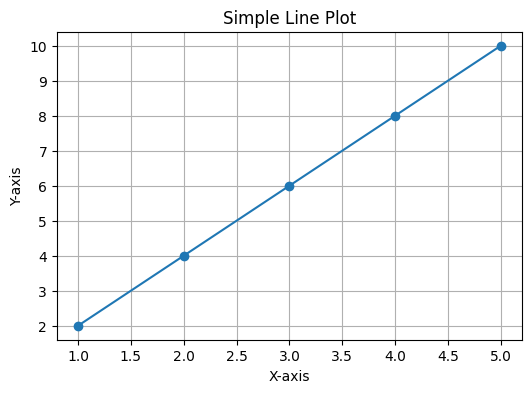

In [3]:
import matplotlib.pyplot as plt
X = [1,2,3,4,5]
Y = [2,4,6,8,10]

plt.figure(figsize=(6,4))
plt.plot(X, Y, marker='o')
plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

# ***Task 5***

In [4]:
from collections import deque
import time, psutil, os
process = psutil.Process(os.getpid())

CAP = (3, 5)
TARGET = 4

def successors(state):
    a, b = state
    succ = []
    succ.append((CAP[0], b))
    succ.append((a, CAP[1]))
    succ.append((0, b))
    succ.append((a, 0))
    transfer = min(a, CAP[1]-b)
    succ.append((a-transfer, b+transfer))
    transfer = min(b, CAP[0]-a)
    succ.append((a+transfer, b-transfer))
    succ = [s for s in succ if s != state]
    uniq = []
    for s in succ:
        if s not in uniq:
            uniq.append(s)
    return uniq

def bfs_water_jug(start=(0,0)):
    start_mem = process.memory_info().rss
    t0 = time.time()
    q = deque([ (start, [start]) ])
    visited = set([start])
    expanded = 0
    while q:
        (state, path) = q.popleft()
        expanded += 1
        if state[0] == TARGET or state[1] == TARGET:
            t1 = time.time()
            end_mem = process.memory_info().rss
            return {"path": path, "expanded": expanded, "time": t1-t0, "mem_diff": end_mem-start_mem}
        for s in successors(state):
            if s not in visited:
                visited.add(s)
                q.append((s, path+[s]))
    return None

def dfs_water_jug(start=(0,0), limit=1000):
    start_mem = process.memory_info().rss
    t0 = time.time()
    stack = [(start, [start])]
    visited = set([start])
    expanded = 0
    while stack:
        state, path = stack.pop()
        expanded += 1
        if state[0] == TARGET or state[1] == TARGET:
            t1 = time.time()
            end_mem = process.memory_info().rss
            return {"path": path, "expanded": expanded, "time": t1-t0, "mem_diff": end_mem-start_mem}
        for s in successors(state):
            if s not in visited:
                visited.add(s)
                stack.append((s, path+[s]))
        if expanded > limit:
            break
    return None

print("Running BFS...")
bfs_res = bfs_water_jug((0,0))
print("BFS result:", bfs_res)

print("\\nRunning DFS...")
dfs_res = dfs_water_jug((0,0))
print("DFS result:", dfs_res)

print("\\nSummary Comparison:")
print("BFS - steps expanded:", bfs_res['expanded'], "time(s):", bfs_res['time'], "mem diff(bytes):", bfs_res['mem_diff'])
print("DFS - steps expanded:", dfs_res['expanded'], "time(s):", dfs_res['time'], "mem diff(bytes):", dfs_res['mem_diff'])

Running BFS...
BFS result: {'path': [(0, 0), (0, 5), (3, 2), (0, 2), (2, 0), (2, 5), (3, 4)], 'expanded': 14, 'time': 7.224082946777344e-05, 'mem_diff': 0}
\nRunning DFS...
DFS result: {'path': [(0, 0), (0, 5), (3, 2), (0, 2), (2, 0), (2, 5), (3, 4)], 'expanded': 7, 'time': 3.790855407714844e-05, 'mem_diff': 0}
\nSummary Comparison:
BFS - steps expanded: 14 time(s): 7.224082946777344e-05 mem diff(bytes): 0
DFS - steps expanded: 7 time(s): 3.790855407714844e-05 mem diff(bytes): 0


# ***Task 6***

A* path from (0, 0) to (5, 5) :
 [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5)]


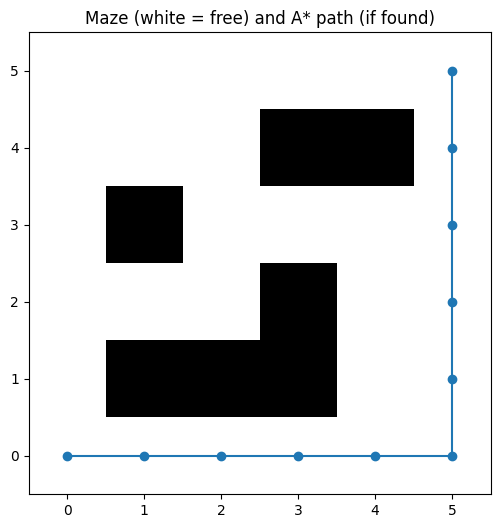

In [5]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

maze = np.array([
    [0,0,0,0,0,0],
    [0,1,1,1,0,0],
    [0,0,0,1,0,0],
    [0,1,0,0,0,0],
    [0,0,0,1,1,0],
    [0,0,0,0,0,0]
])

start = (0,0)
goal = (5,5)

def neighbors(node):
    x, y = node
    for dx, dy in [(1,0),(-1,0),(0,1),(0,-1)]:
        nx, ny = x+dx, y+dy
        if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1]:
            if maze[nx, ny] == 0:
                yield (nx, ny)

def manhattan(a,b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

def astar(start, goal):
    open_set = []
    heapq.heappush(open_set, (0+manhattan(start,goal), 0, start, None))
    came_from = {}
    g_score = {start: 0}
    closed = set()
    while open_set:
        f, g, node, parent = heapq.heappop(open_set)
        if node in closed:
            continue
        came_from[node] = parent
        if node == goal:
            path = []
            cur = node
            while cur is not None:
                path.append(cur)
                cur = came_from[cur]
            return list(reversed(path))
        closed.add(node)
        for nbr in neighbors(node):
            tentative_g = g + 1
            if nbr in g_score and tentative_g >= g_score[nbr]:
                continue
            g_score[nbr] = tentative_g
            heapq.heappush(open_set, (tentative_g + manhattan(nbr, goal), tentative_g, nbr, node))
    return None

path = astar(start, goal)
print("A* path from", start, "to", goal, ":\n", path)

plt.figure(figsize=(6,6))
plt.imshow(maze, cmap='gray_r')
if path:
    xs = [p[1] for p in path]
    ys = [p[0] for p in path]
    plt.plot(xs, ys, marker='o')
plt.title("Maze (white = free) and A* path (if found)")
plt.gca().invert_yaxis()
plt.show()